# Introduction

In this report we are analyzing data from marathon runners. With it we will be predicting the gender of the runner based on the age and the total time it had taken them to run. To do this, I had first created a new column that tells me the total amount of minutes the runner used to run the marathon. I also had the data split by the genders. After which I used a built-in python function called the `gaussian_kde`, which makes the given data into a probability like function. It shows us the probability of a certain gender based on age and finishing at a certain time. Once I had used the `gaussian_kde` for both genders I have created a function `predictor` that would look thru the original data and predict the gender. The predicted probability is then added to the graph. We lastly look at how accurate the predictions are.


In [70]:
#needed libaires to complete this report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde



We will first read the file to retrieve the data after which I add a new column of total amounts of minutes in the track

In [71]:

df = pd.read_csv("marathon_results.csv") #reading file containng data
df["tot_minutes"] = pd.to_timedelta(df["Finish"]).dt.total_seconds()/60 #adding new column

I had then split the data by the given genders and used the `gaussian_kde` function to create a probability function

In [72]:
#split data
dfm = df[df["M/F"] == "M"]
dff = df[df["M/F"] == "F"]

dfm[["tot_minutes", "Age"]].T
dff[["tot_minutes", "Age"]].T

#using gaussian_kde to create probabilty funcition
kdem = gaussian_kde(dfm[["tot_minutes", "Age"]].T, bw_method=0.2)
kdef = gaussian_kde(dff[["tot_minutes", "Age"]].T, bw_method=0.2)

I had then plotted the probability graphs as a contour graph. The y-axis gives us the age and the x-axis for total amount of minutes for both male and female.

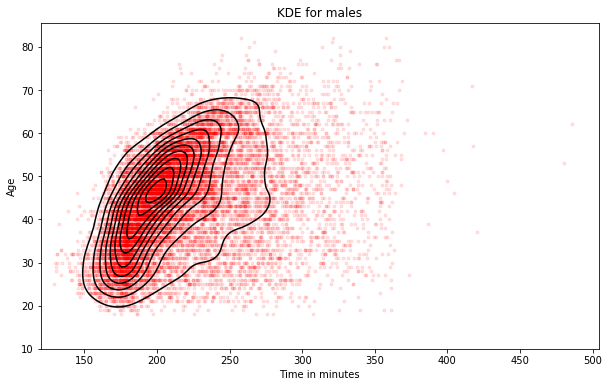

In [73]:
plt.figure(figsize=(10, 6))
x = np.linspace(120, 360, 100)
y = np.linspace(10, 70, 100)
X, Y = np.meshgrid(x, y)
Z = kdem(np.array([X.flatten(), Y.flatten()])).reshape(X.shape)
plt.contour(X, Y, Z, levels=10, colors='k', zorder=10)
plt.plot(dfm["tot_minutes"], dfm["Age"], 'r.', alpha=0.1)
plt.title('KDE for males')
plt.xlabel('Time in minutes')
plt.ylabel("Age");

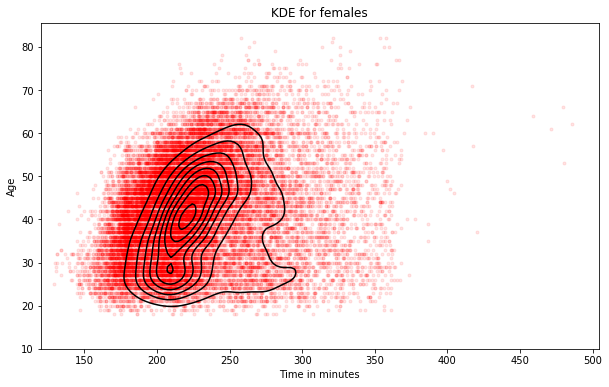

In [74]:
plt.figure(figsize=(10, 6))
x = np.linspace(120, 360, 100)
y = np.linspace(10, 70, 100)
X, Y = np.meshgrid(x, y)
Z = kdef(np.array([X.flatten(), Y.flatten()])).reshape(X.shape)
plt.contour(X, Y, Z, levels=10, colors='k', zorder=10)
plt.plot(dff["tot_minutes"], dff["Age"], 'r.', alpha=0.1)
plt.plot(dfm["tot_minutes"], dfm["Age"], 'r.', alpha=0.1)
plt.title('KDE for females')
plt.xlabel('Time in minutes')
plt.ylabel("Age");

My next step was to analyze how the predictions were being made for both genders, so i had graphed the lines showing the predictions for both genders

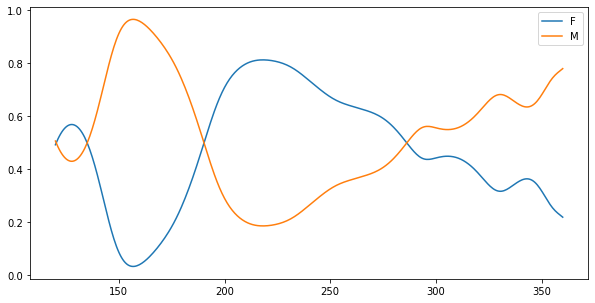

In [75]:
train_dfm = df[df["M/F"] == "M"]
train_dff = df[df["M/F"] == "F"]




kdem = gaussian_kde(train_dfm[["tot_minutes", "Age"]].T, bw_method=0.2)
kdef = gaussian_kde(train_dff[["tot_minutes", "Age"]].T, bw_method=0.2)


mc = len(train_dfm)
fc = len(train_dff)

prob_f = fc/(fc+mc)
prob_m = mc/(fc+mc)

def predictor_f(t,a):
    return (kdef([t,a])*prob_f)/(kdef([t,a])*prob_f + kdem([t,a])*prob_m)


def predictor_m(t,a):
    return (kdem([t,a])*prob_m)/(kdem([t,a])*prob_m + kdef([t,a])*prob_f)


x = np.linspace(120, 360, 400)
a = np.linspace(10, 70, 400)
plt.figure(figsize=(10, 5))
plt.plot(x, predictor_f(x,a), label = 'F')
plt.plot(x, predictor_m(x,a), label = 'M')
plt.legend()
plt.show()

It seems that there are certain age groups were the women would finish then men and vice versa. Causing the graphs to have complete opposite lines based on the genders.


I then added two new columns to my original data to show to predicted gender for each runner.


In [76]:
df["prob_F"] = predictor_f(df["tot_minutes"],df["Age"])
df["prob_M"] = predictor_m(df["tot_minutes"],df["Age"])
df.sample(10)

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Finish,Pace,Overall,Gender,Division,tot_minutes,prob_F,prob_M
19659,52,F,USA,00:27:35,00:54:46,01:22:37,01:50:47,01:56:48,02:19:05,02:49:41,03:23:36,03:53:03,04:05:29,00:09:22,19806,8138,728,245.483333,0.676653,0.323347
10770,28,F,USA,00:23:23,00:46:21,01:09:44,01:34:01,01:39:26,01:59:13,02:25:33,02:53:01,03:20:41,03:32:01,00:08:06,10807,2751,2148,212.016667,0.846159,0.153841
14207,55,M,CAN,00:25:35,00:50:31,01:14:55,01:40:59,01:46:29,02:07:10,02:34:30,03:02:51,03:30:27,03:42:44,00:08:30,14279,9506,753,222.733333,0.226892,0.773108
9580,60,M,CAN,00:23:47,00:47:28,01:11:08,01:35:16,01:40:30,01:59:39,02:25:52,02:51:58,03:17:20,03:28:30,00:07:58,9609,7462,55,208.500000,0.045000,0.955000
24073,65,F,CAN,00:32:32,01:05:23,01:35:58,02:10:37,02:17:37,02:43:23,03:18:59,03:54:59,04:31:25,04:47:37,00:10:59,24304,10711,54,287.616667,0.459229,0.540771
16894,51,M,USA,00:26:04,00:51:14,01:16:43,01:43:00,01:48:40,02:09:24,02:37:24,03:07:54,03:38:28,03:52:20,00:08:52,17006,10552,1555,232.333333,0.609400,0.390600
23011,33,M,USA,00:31:44,01:02:33,01:34:01,02:04:42,02:11:23,02:35:51,03:08:50,03:43:26,04:18:07,04:33:13,00:10:26,23221,13112,4550,273.216667,0.590116,0.409884
14908,51,F,USA,00:25:46,00:51:15,01:16:58,01:43:19,01:49:03,02:10:04,02:37:38,03:05:43,03:33:23,03:45:09,00:08:36,14987,5205,241,225.150000,0.486766,0.513234
11580,27,F,USA,00:24:06,00:47:33,01:11:02,01:35:37,01:40:59,01:59:38,02:24:06,02:51:49,03:21:31,03:34:32,00:08:11,11626,3243,2467,214.533333,0.854209,0.145791
8658,44,M,CAN,00:22:13,00:44:34,01:07:54,01:32:00,01:37:13,01:56:32,02:22:14,02:48:34,03:14:43,03:25:44,00:07:51,8680,6951,1298,205.733333,0.327695,0.672305


Looking at a random sample from the data wasn’t helpful in telling us how accurate our predictions were. So I then calculated the amount of times all the predictions over 50% and matched the true gender divided by the amount of runners

In [67]:
sum((df["prob_F"] >= 0.5) == (df["M/F"] == "F"))/len(df)

0.7647349608335234

In [68]:
sum((df["prob_M"] >= 0.5) == (df["M/F"] == "M"))/len(df)

0.7647349608335234

It turns out there was a 76% chance if getting the true gender

# Conclusion

After analyzing the data, there seemed to be a 76% accuracy when it came to figuring out the gender based on total time and age. Which is higher then when we tried to figure out the gender just by based on the finish time.